# LAb4: Modelos polinomiais

<hr style="border:1px  solid black"> </hr>

## Nome: Eduardo Marques
## Número: 45977

<hr style="border:1px  solid black"> </hr>

## Desenvolva e corra o código pedido nas células imediatamente abaixo das perguntas.

# IMPORTANTE:
## Uma vez completado, grave este Jupyter notebook com o seguinte nome:
## Axxxxx-Lab4.ipynb (Axxxxx: número de aluno)
##  e depois submeta o ficheiro no link do Moodle providenciado para o efeito.

<hr style="border:2px solid black"> </hr>

# Pergunta 1 - Discriminantes polinomiais:
### Considere o ficheiro pickle $\texttt{Lab4-data-P1.p}$ onde se encontra um dicionário de Python com as seguintes variáveis:
* #### "data":       dados bi-dimensionais (4000 amostras)
* #### "target":     classe dos dados (inteiros de 0 a 3)
* #### "foldTrain":  array boleano indicando os dados a serem usados para treinar os classificadores
* #### "foldTest":   array boleano indicando os dados a serem usados para testar os classificadores
## a) Use os dados de treino para estimar discriminante polinomial de 4ª ordem.
## b) Calcule as matrizes de confusão e o número total de erros nos dados de treino e de teste. Imprima os resultados.
## c) Faça um "plot" dos dados de teste por classe, e dos erros do discriminante polinomial.
## d) Explique brevemente porque é que mais de metade dos pontos da classe "0" não são bem classificados 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import confusion_matrix
D=pickle.load(open('Lab4-data-P1.p','rb'))
print(D.keys())

dict_keys(['data', 'target', 'foldTrain', 'foldTest'])


## 1.a)

In [116]:
from sklearn.preprocessing import PolynomialFeatures

X = D['data']
y = D['target']

f1, f2 = D['foldTrain'], D['foldTest']
X1, X2 = X[:,f1], X[:,f2]
y1, y2 = y[f1], y[f2]

Y1 = -np.ones((4,y1.shape[0]))
for i in range(4):
    Y1[i, y1==i]=1 

poly = PolynomialFeatures(degree=4).fit(X1.T)
X1b = poly.transform(X1.T).T
X2b = poly.transform(X2.T).T
Rx = np.dot(X1b,X1b.T)
rxy = np.dot(X1b,Y1.T)
w = np.dot(np.linalg.pinv(Rx),rxy)
print(w)


[[-1.01087333 -0.91228197 -0.18925543  0.11241073]
 [-0.10814641 -0.9819312   1.48387936 -0.39380175]
 [-0.02863116  0.59674775  1.16774223 -1.73585883]
 [-0.11488254 -0.11727087 -0.02447086  0.25662427]
 [ 0.34361668 -1.51172998  0.87998072  0.28813259]
 [ 0.03040513  0.41553015 -0.28559344 -0.16034185]
 [ 0.164921    1.18447262 -0.94157395 -0.40781967]
 [-0.28020065  0.19618622 -0.41951577  0.50353021]
 [-0.0536248   0.11573116 -0.39037167  0.32826531]
 [ 0.00776227 -0.11879243 -0.2401936   0.35122376]
 [ 0.16502012  0.45816967 -0.31502099 -0.30816881]
 [-0.21038912  0.44203375 -0.25853955  0.02689493]
 [ 0.14284227  0.09198926 -0.17925936 -0.05557217]
 [-0.08604078  0.33104047 -0.2086501  -0.03634959]
 [ 0.06637006 -0.09710581  0.02218986  0.00854589]]


## 1.b)

In [117]:
y1e = np.argmax(np.dot(w.T,X1b),axis=0)
y2e = np.argmax(np.dot(w.T,X2b),axis=0)
MC_treino = confusion_matrix(y1, y1e)
MC_teste = confusion_matrix(y2, y2e)

print('Treino:')
print(MC_treino)
print('Erros:', np.sum(y1 != y1e))

print('Treino:')
print(MC_teste)
print('Erros:', np.sum(y2 != y2e))


Treino:
[[ 99   0   0   1]
 [  0 100   0   0]
 [  0   0 100   0]
 [  0   0   0 100]]
Erros: 1
Treino:
[[419 325  55 101]
 [  0 900   0   0]
 [  0   0 900   0]
 [  3   0   0 897]]
Erros: 484


## 1.c)

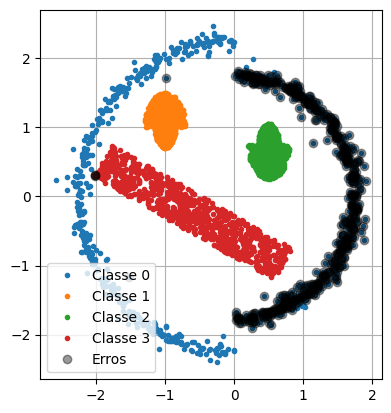

In [118]:
plt.plot(X2[0, y2==0], X2[1, y2==0], '.', label='Classe 0')
plt.plot(X2[0, y2==1], X2[1, y2==1], '.', label='Classe 1')
plt.plot(X2[0, y2==2], X2[1, y2==2], '.', label='Classe 2')
plt.plot(X2[0, y2==3], X2[1, y2==3], '.', label='Classe 3')
plt.plot(X2[0, y2!=y2e], X2[1, y2!=y2e], 'ok', alpha=.4, label='Erros')
plt.legend()
plt.axis('scaled')
plt.grid(True)

## 1.d)

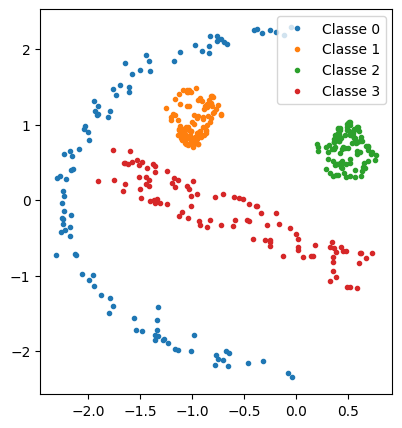

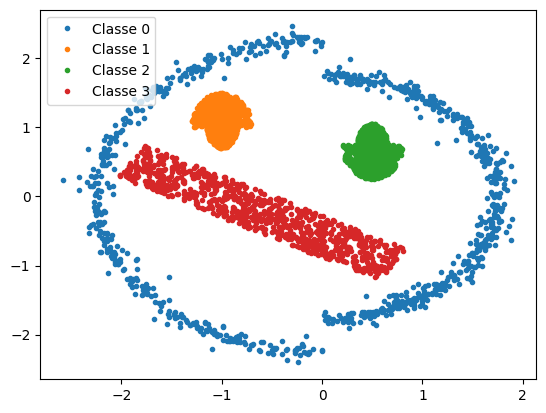

In [119]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(X1[0, y1==0], X1[1, y1==0], '.', label='Classe 0')
plt.plot(X1[0, y1==1], X1[1, y1==1], '.', label='Classe 1')
plt.plot(X1[0, y1==2], X1[1, y1==2], '.', label='Classe 2')
plt.plot(X1[0, y1==3], X1[1, y1==3], '.', label='Classe 3')
plt.legend()
plt.figure(122)
plt.plot(X2[0, y2==0], X2[1, y2==0], '.', label='Classe 0')
plt.plot(X2[0, y2==1], X2[1, y2==1], '.', label='Classe 1')
plt.plot(X2[0, y2==2], X2[1, y2==2], '.', label='Classe 2')
plt.plot(X2[0, y2==3], X2[1, y2==3], '.', label='Classe 3')
plt.legend()

Como podemos ver, os dados de treino da classe 0 apenas se encontram do lado esquerdo do plot, enquanto que os dados de teste se encontram tanto à esquerda como à direita, o que faz com que praticamente metade dos dados de treino da classe 0 sejam considerados errados.

<hr style="border:2px solid black"> </hr>

# Pergunta 2 - Regressão polinomial:
### Considere o ficheiro pickle $\texttt{Lab4-data-P2.p}$ onde se encontra um dicionário de Python com as seguintes variáveis:
* #### "x":       dados uni-dimensionais/variável independente (500 pontos)
* #### "y":       variável dependente/saídas desejadas (500 pontos)
* #### "foldTrain":  array boleano indicando os dados a serem usados para treinar os classificadores
* #### "foldTest":   array boleano indicando os dados a serem usados para testar os classificadores

## a) Use os dados de treino para estimar um regressor polinomial de 5ª ordem. Imprima os valores dos pesos.
## b) Calcule o coeficiente de determinação ($\bf R^2$) para os dados de treino e para os dados de teste.
## c) Faça um "plot" do polinómio estimado. Visualize o polinómio conjutamente com os dados de teste. 
## d)  Explique brevemente porque é que o modelo não está bem adaptado aos dados de teste.

In [125]:
D=pickle.load(open('Lab4-data-P2.p','rb'))
D.keys()

dict_keys(['x', 'y', 'foldTrain', 'foldTest'])

## 2.a)

In [126]:
from sklearn.linear_model import LinearRegression

x = D['x']
y = D['y']
f1 = D['foldTrain']
f2 = D['foldTest']
x1, x2 = x[f1], x[f2]
y1, y2 = y[f1], y[f2]

print('Shape x1:', x1.shape)
print('Shape x2:', x2.shape)
x1 = x1[:,np.newaxis]
x2 = x2[:,np.newaxis]
print('Shape x1:', x1.shape)
print('Shape x2:', x2.shape)

poly = PolynomialFeatures(degree=5).fit(x1)
X1a = poly.transform(x1).T
X2a = poly.transform(x2).T
lr = LinearRegression().fit(X1a.T,y1)
w_sklearn = lr.coef_.copy()
w_sklearn[0] = lr.intercept_

print('w:', w_sklearn)

Shape x1: (250,)
Shape x2: (250,)
Shape x1: (250, 1)
Shape x2: (250, 1)
w: [ 3.94647968  1.66738131 -0.25033723 -0.45238482  0.03881964  0.00883479]


## 2.b)

In [127]:
y1e = np.dot(w_sklearn,X1a)
y2e = np.dot(w_sklearn,X2a)
# Treino
SQtot    = np.var(y1)
SQres    = np.mean((y1-y1e)**2)
R2treino = 1.-SQres/SQtot
# Teste
SQtot    = np.var(y2)
SQres    = np.mean((y2-y2e)**2)
R2teste  = 1.-SQres/SQtot

print('R2 treino manual:', R2treino)
print('R2 teste manual:', R2teste)

print('R2 treino sklearn:', lr.score(X1a.T, y1))
print('R2 teste sklearn', lr.score(X2a.T, y2))

R2 treino manual: 0.961163242355513
R2 teste manual: -4.295877410654273
R2 treino sklearn: 0.9611632423555129
R2 teste sklearn -4.295877410654272


## 2.c)

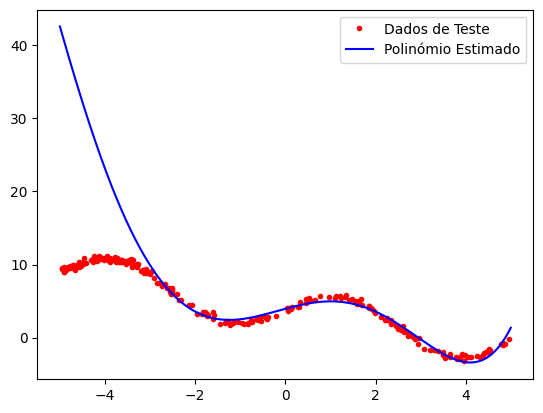

In [131]:
t = np.linspace(np.round(x.min()),np.round(x.max()),500)
T = poly.transform(t[:,np.newaxis]).T
yt = np.dot(w_sklearn,T)

plt.plot(x2, y2, '.', color='red', label='Dados de Teste')
plt.plot(t,  yt, color='blue', label='Polinómio Estimado')
plt.legend()
plt.show()

## 2.d)

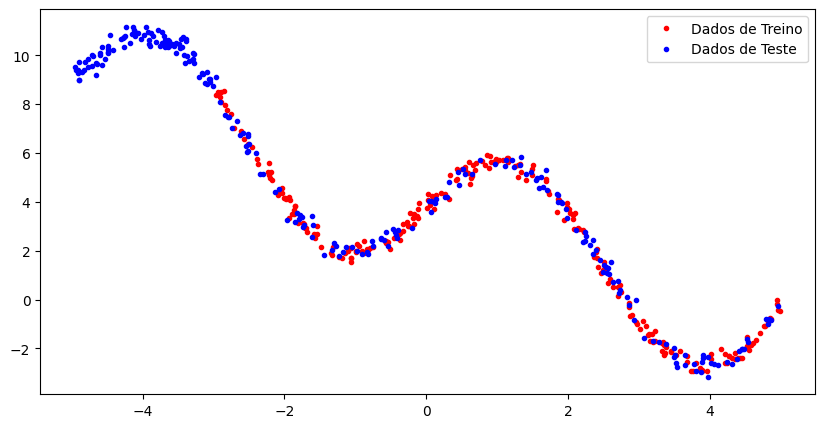

In [129]:
plt.figure(figsize=(10,5))
plt.plot(x1, y1, '.', color='red', label='Dados de Treino')
plt.plot(x2, y2, '.', color='blue', label='Dados de Teste')
plt.legend()

Este modelo não está bem adaptado aos dados de teste porque, como podemos ver nos plots a cima à esquerda, existem dados de teste que não constam nos dados de treino, o que faz com que o polinómio estimado cresça para infinito em vez de fazer a curva para baixo, o que significa que os dados de teste à esquerda não sejam abrangidos pelo polinómio.